## Chemical Reactor Analysis and Design Fundamentals - Rawlings and Ekerdt: Computational Appendix
This notebook is an attempt at python version of octave code from [computational appendix](http://jbrwww.che.wisc.edu/home/jbraw/chemreacfun/web-appendix.pdf).

### A1. Linear Algebra and Least Squares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/shanki/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# stoichiometric matrix
stoi = np.array([[0,1,0,-1,-1,1],
                [-1,1,1,-1,0,0],
                [1,0,-1,0,-1,1]])
print(stoi)

# rank of stoichiometric matrix
rank = np.linalg.matrix_rank(stoi)
print('Rank of matrix is ',rank)

[[ 0  1  0 -1 -1  1]
 [-1  1  1 -1  0  0]
 [ 1  0 -1  0 -1  1]]
('Rank of matrix is ', 2)


In [3]:
# reaction rates of 3 reactions 
r = np.array([1,2,3])

# species production rates
R = np.dot(np.transpose(stoi),r)
print R

[ 1  3 -1 -3 -4  4]


In [4]:
# Example A.1: Estimating Reaction Rates

stoi = np.array([[0,1,0,-1,-1,1],[-1,1,1,-1,0,0]])
print("Stoichiometry Matrix")
print(stoi)
print

r = np.array([1,2])
print("Reaction rates")
print(r)
print

R = np.dot(np.transpose(stoi),r)
print("Species rates")
print R
print

Stoichiometry Matrix
[[ 0  1  0 -1 -1  1]
 [-1  1  1 -1  0  0]]

Reaction rates
[1 2]

Species rates
[-2  3  2 -3 -1  1]



In [5]:
# Simulate species formation rates
nmeas = 2000
nspec = stoi.shape[1]
print nspec

Rexpt = np.random.randn(nmeas,nspec)*0.05 + np.repeat([R],[nmeas],axis = 0)

6


In [6]:
# Estimate reaction rates
nu_nuT = np.dot(stoi,np.transpose(stoi))
nu_nuT_inv = np.linalg.inv(nu_nuT)
nu_R = np.dot(stoi,np.transpose(Rexpt))
rest = np.dot(nu_nuT_inv,nu_R)
rest = np.transpose(rest)
rest.shape

(2000, 2)

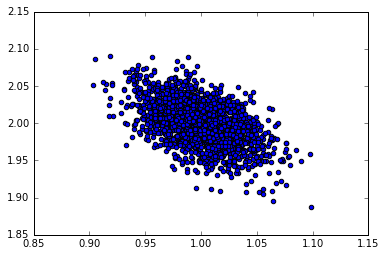

In [7]:
plt.scatter(rest[:,0],rest[:,1])

## Solving Nonlinear Equations

In [8]:
def dgdx(x):
    K1 = 108
    K2 = 284
    P = 2.5
    yI0 = 0.5
    yB0 = 0.5
    yP10 = 0.0
    yP20 = 0.0
    d = 1 - x[0] - x[1]
    yI = (yI0 - x[0] - x[1])/d
    yB = (yB0 - x[0] - x[1])/d
    yP1 = (yP10 + x[0])/d
    yP2 = (yP20 + x[1])/d
    residual = np.zeros(2)
    residual[0] = P*K1*yI*yB - yP1
    residual[1] = P*K2*yI*yB - yP2
    return residual

In [9]:
xinit = np.array([0.2,0.2])

In [10]:
import scipy.optimize as spopt
solobj = spopt.fsolve(dgdx,xinit,full_output = 1)

In [11]:
solobj

(array([ 0.13335692,  0.35067931]), {'fjac': array([[-0.37473938, -0.9271302 ],
         [ 0.9271302 , -0.37473938]]),
  'fvec': array([ -1.80883086e-11,  -4.63823424e-11]),
  'nfev': 13,
  'qtf': array([ -1.00517351e-07,  -1.20727197e-09]),
  'r': array([ 85.32030584,  98.724343  ,   2.67276552])}, 1, 'The solution converged.')

In [12]:
# Solution
x = solobj[0]
print x

# last element of solobj has message (in this case solution converged)
print solobj[-1:]

[ 0.13335692  0.35067931]
('The solution converged.',)


## Nonlinear Optimization

In [13]:
def gibbs(x):
    dg1 = -3.72e3
    dg2 = -4.49e3
    T = 400
    R = 1.987
    P = 2.5
    K1 = np.exp(-dg1/(R*T))
    K2 = np.exp(-dg2/(R*T))
    yI0 = 0.5
    yB0 = 0.5
    yP10 = 0.0
    yP20 = 0.0
    d = 1 - x[0] - x[1]
    yI = (yI0 - x[0] - x[1])/d
    yB = (yB0 - x[0] - x[1])/d
    yP1 = (yP10 + x[0])/d
    yP2 = (yP20 + x[1])/d
    retval = -(x[0]*np.log(K1) + x[1]*np.log(K2)) + (1-x[0]-x[1])*np.log(P) + yI*d*np.log(yI) + \
          yB*d*np.log(yB) + yP1*d*np.log(yP1) + yP2*d*np.log(yP2)
        
    print x, retval
    return retval   

In [14]:
gibbs(np.array([0.2,0.2]))

[ 0.2  0.2] -2.31395090567


-2.3139509056689858

In [15]:
cons = ({'type':'ineq','fun': lambda x: -x[0]-x[1]+0.49})
bnds = ((0.0,0.5),(0.0,0.5))

In [16]:
x0 = np.array([0.2,0.2])
res = spopt.minimize(gibbs, x0, method = "Nelder-Mead", bounds = bnds, constraints = cons)

[ 0.2  0.2] -2.31395090567
[ 0.21  0.2 ] -2.3438717325
[ 0.2   0.21] -2.35355970432
[ 0.21  0.21] -2.38142321337
[ 0.215  0.215] -2.41143649816
[ 0.205  0.225] -2.42065918586
[ 0.2025  0.2375] -2.45408614368
[ 0.2175  0.2425] -2.49327159964
[ 0.22625  0.25875] -2.5190704609
[ 0.21375  0.28125] -2.52109939438
[ 0.213125  0.314375] nan
[ 0.2375  0.3025] nan
[ 0.21125  0.25375] -2.50847279427
[ 0.22875  0.28625] nan
[ 0.215625  0.261875] -2.52311210268
[ 0.203125  0.284375] -2.53593488691
[ 0.1915625  0.2971875] -2.54215758981
[ 0.1934375  0.2778125] -2.53104230049
[ 0.169375  0.313125] -2.55250662846
[ 0.14625  0.33875] -2.55838948798
[ 0.144375  0.358125] nan
[ 0.18117187  0.29789062] -2.54591334994
[ 0.13585937  0.33945312] -2.55506478673
[ 0.1009375  0.3803125] -2.55336848778
[ 0.12099609  0.35970703] -2.55795771479
[ 0.13138672  0.35900391] -2.55626062733
[ 0.13250488  0.35411621] -2.55882838242
[ 0.15775879  0.33315918] -2.55321111652
[ 0.13018677  0.35307007] -2.55920530436
[ 0.116

/Users/shanki/anaconda/lib/python2.7/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)
/Users/shanki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in log


In [17]:
res

 final_simplex: (array([[ 0.13315505,  0.35086399],
       [ 0.13313019,  0.35091824],
       [ 0.13324898,  0.35078172]]), array([-2.55928244, -2.55928244, -2.55928242]))
           fun: -2.5592824439800417
       message: 'Optimization terminated successfully.'
          nfev: 60
           nit: 32
        status: 0
       success: True
             x: array([ 0.13315505,  0.35086399])

In [18]:
gibbs(np.array([0.2,0.2]))

[ 0.2  0.2] -2.31395090567


-2.3139509056689858